In [42]:
#check waveforms 

import obspy 

from obspy import read

from obspy import Stream


##STATIONS

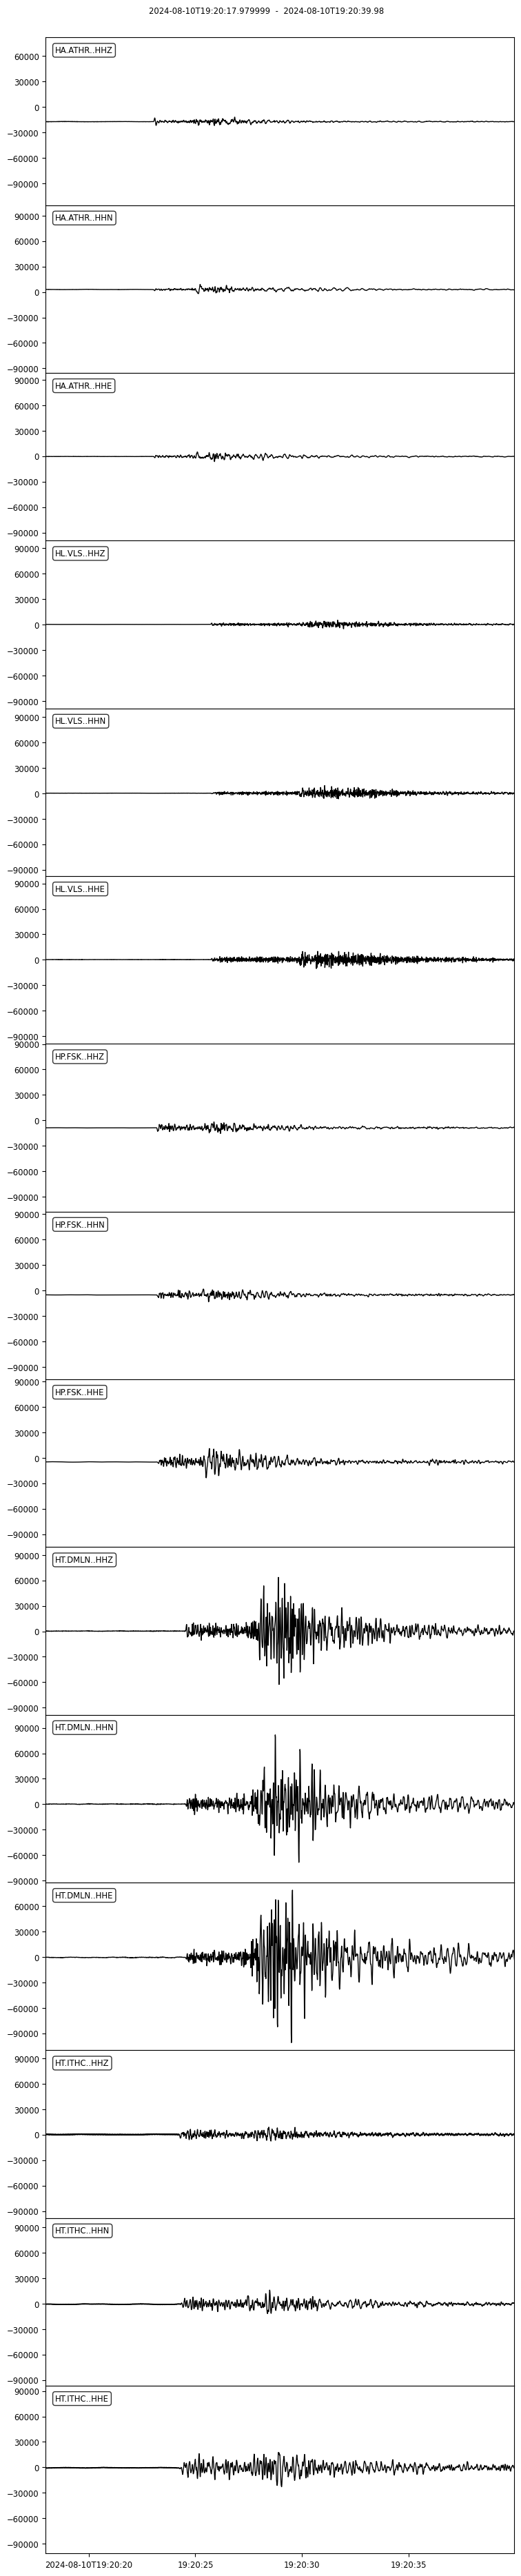

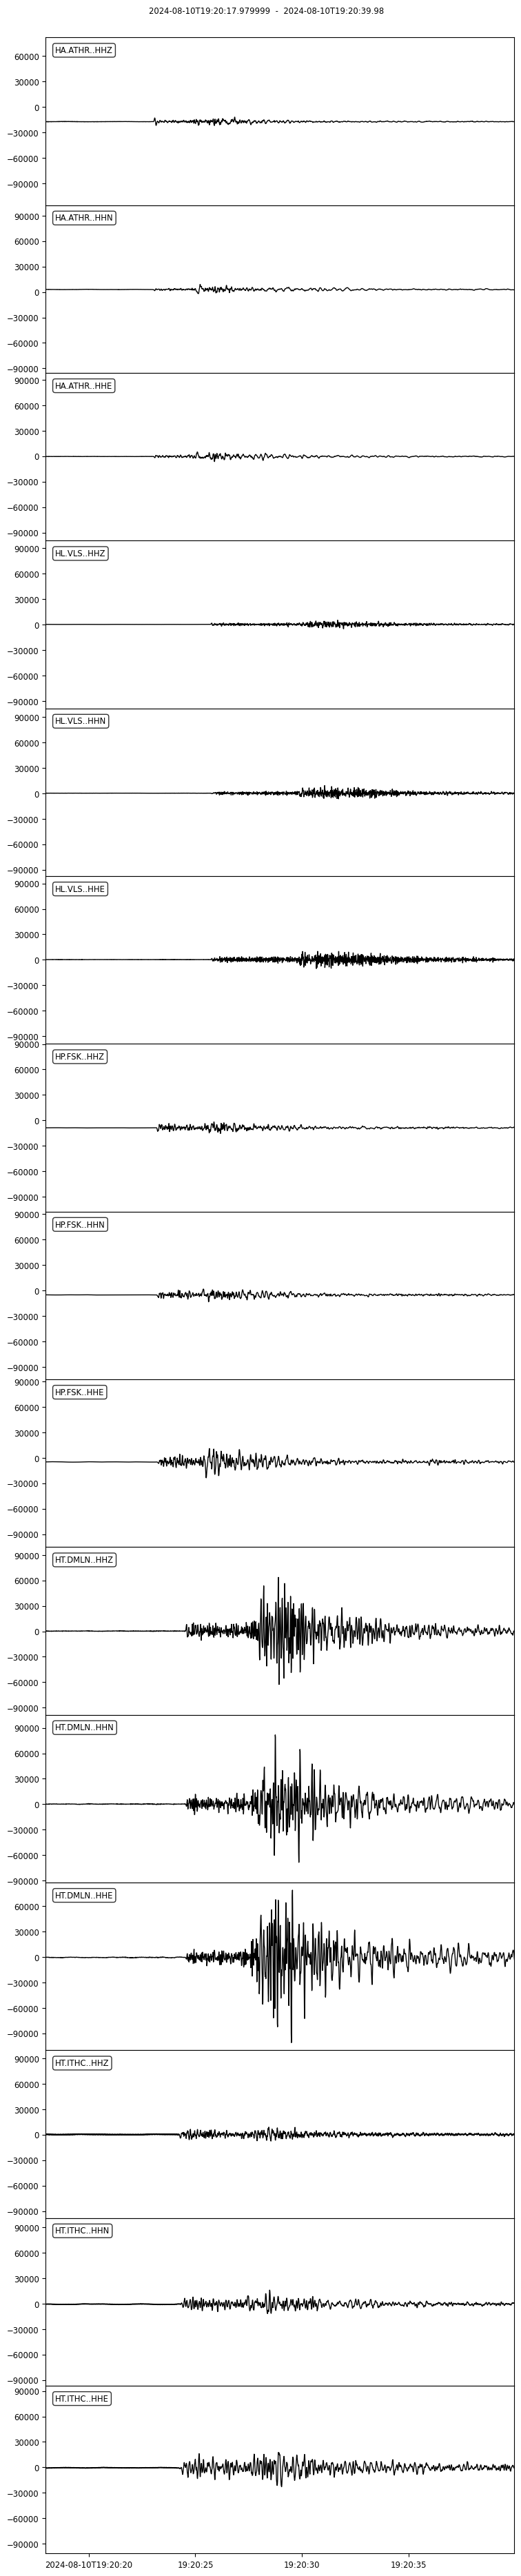

In [63]:
path = '/home/emanuele/data/emanuele/loki-das/cefalonia/noa2024prefy.mseed'


st = read(path)

st.plot()


##FIBER

In [ ]:
path = '/home/emanuele/data/emanuele/loki-das/cefalonia/noa2024prefy_das.mseed'
save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/pqvcv/noa2024prefy_das_sel.mseed'

st = read(path)

print(st)

selected_stations = ["0223", "1663", "1723", "2487", "3039", "7150", "7185"]  # Replace with your station IDs

filtered_stream = Stream()

for a in selected_stations: 
    print(str(a))
    b = st.select(station=str(a))
    filtered_stream.append(b[0])

#filtered_stream.write(save_path, format="MSEED")



7750 Trace(s) in Stream:

OF.0001..HHZ | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:37.976000Z | 250.0 Hz, 5000 samples
...
(7748 other traces)
...
OF.7750..HHZ | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:37.976000Z | 250.0 Hz, 5000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
0223
1663
1723
2487
3039
7150
7185


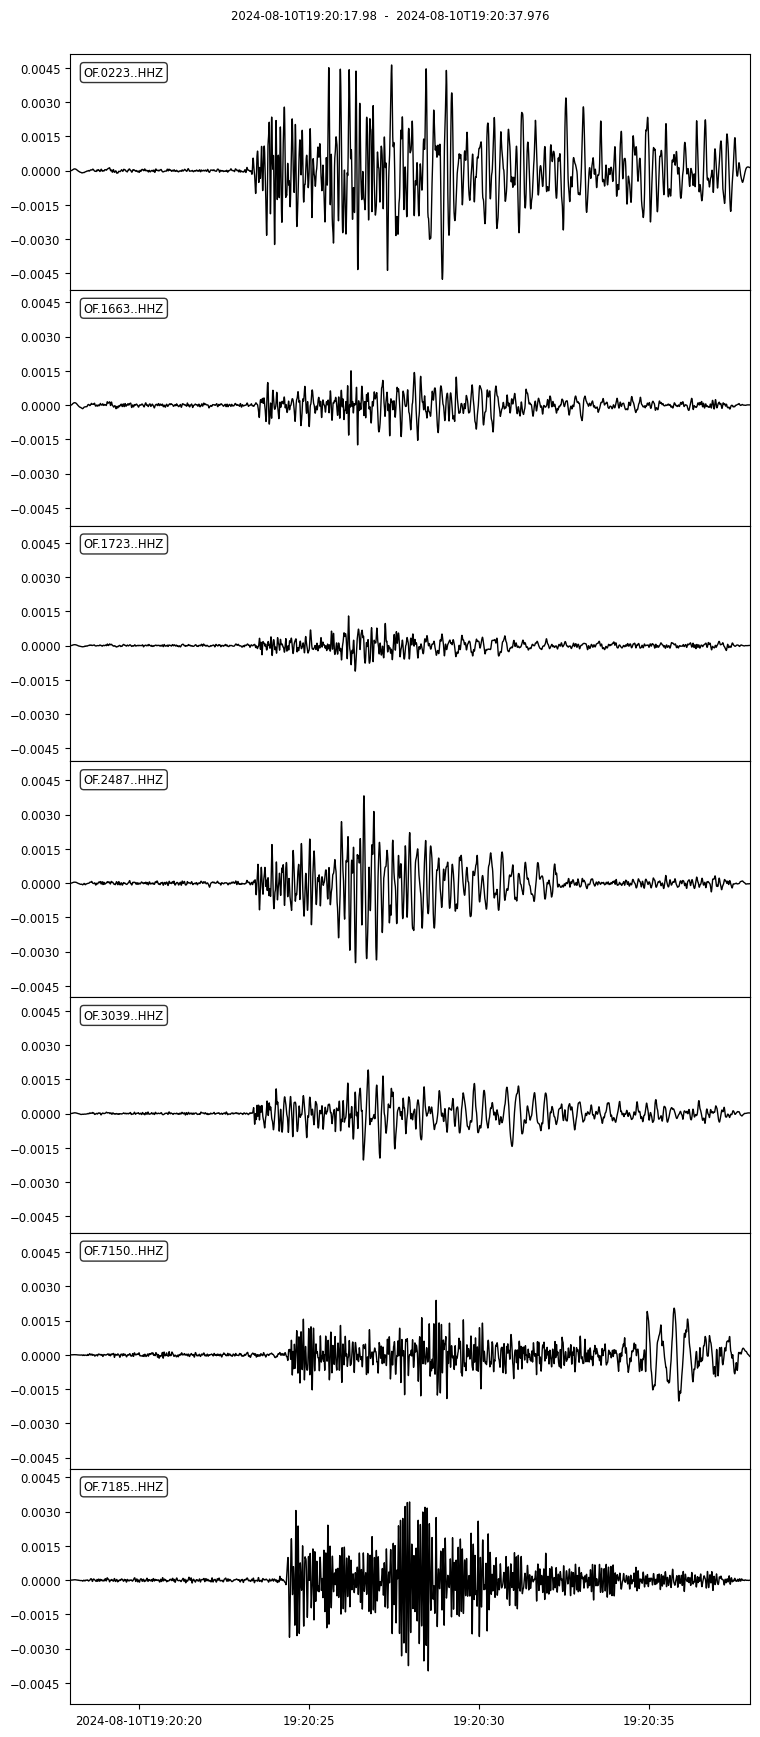

/home/emanuele/miniconda3/envs/loki-DAS-ema/lib/python3.7/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [62]:
das = read(save_path)

das_filt = das.copy()

das = das.detrend("demean")  
das = das.taper(0.05, type='cosine')
das_filt = das.filter("bandpass", freqmin=2.0, freqmax = 20)  
das_filt.plot()

das_filt.write(save_path, format="MSEED")

In [27]:
path = '/home/emanuele/data/emanuele/loki-das/cefalonia/noa2024prefy.mseed'
save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/noa2024prefy_sel.mseed'


st = read(path)

print(st)

selected_stations = st.select(id="VLS")  # Selects stations RAB, RCD, REF

# Print the filtered traces
print(filtered_stream)

# Save the filtered traces to a new MiniSEED file (optional)
filtered_stream.write(save_path, format="MSEED")

15 Trace(s) in Stream:
HA.ATHR..HHZ | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HA.ATHR..HHE | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HA.ATHR..HHN | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HL.VLS..HHZ  | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HL.VLS..HHE  | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HL.VLS..HHN  | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HP.FSK..HHN  | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HP.FSK..HHE  | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HP.FSK..HHZ  | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HT.DMLN..HHN | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 sampl

ValueError: not enough values to unpack (expected 4, got 1)